In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

In [37]:
amz = pd.read_csv("amazon.csv")
amz.head()

,idAmazon,title,description,manufacturer,price
0,b000jz4hqo,clickart 950 000 - premier image pack (dvd-rom),NaN,broderbund,0.00
1,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,computer associates,0.00
2,b00004tkvy,noah's ark activity center (jewel case ages 3-8),NaN,victory multimedia,0.00
3,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,sage software,599.99
4,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,carry-a-tune technologies,99.99


In [38]:
gg = pd.read_csv("google.csv")
gg.head()

,id,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,NaN,8.49
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,NaN,12.95
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99


In [39]:
truth = pd.read_csv("amazon_google_truth.csv")
truth.head()

,idAmazon,idGoogleBase
0,b000jz4hqo,http://www.google.com/base/feeds/snippets/1844...
1,b00004tkvy,http://www.google.com/base/feeds/snippets/1844...
2,b000g80lqo,http://www.google.com/base/feeds/snippets/1844...
3,b0006se5bq,http://www.google.com/base/feeds/snippets/1842...
4,b00021xhzw,http://www.google.com/base/feeds/snippets/1843...


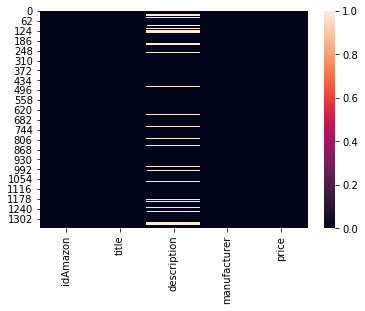

In [40]:
sns.heatmap(amz.isnull())

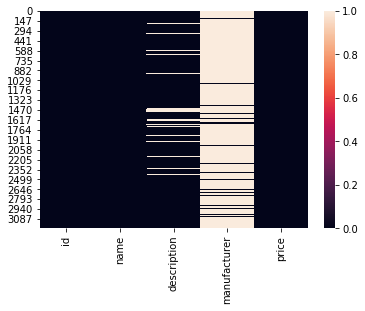

In [41]:
sns.heatmap(gg.isnull())

In [45]:
nums = "0123456789." 
gg_price = []
for index, row in gg.iterrows():
    if type(row['price']) == str:
        to_flt = ''.join(c for c in row['price'] if c in nums)
        print(to_flt)
        gg_price.append(float(to_flt))
    elif type(row['price']) == int:
        gg_price.append(float(row['price']))
    elif type(row['price']):
        continue

38.99
8.49
637.99
12.95
805.99
103.99
585.99
1054.99
25.99
92.99
1474.99
29.95
14.99
2068.26
154.6
95.12
137.09
195.53
499.17
2021.99
3715.48
149.43
663.22
18.88
16.09
1054.23
751.44
1562.06
179.03
29.93
3992.98
61.94
34.38
93.33
72.74
7022.74
1834.4
742.21
2426.1
1589.95
17.21
3640.84
3223.26
14.51
371.5
377.61
1320.64
94.08
459.3
538.5
195.77
2565.08
16.09
6594.2
215.57
75.48
2181.91
197.65
85.85
125.97
12567.39
1001.38
18.88
43.85
841.55
147.73
2279.02
2270.06
18.88
86.94
843.15
1056.98
3.29
666.65
20.97
20.97
24.8
93.25
363.63
37.24
377.06
26759.24
3323.92
14568.97
5189.82
4275.71
16.98
41.74
160.88
69.38
409.56
18.88
379.23
1306.68
67.47
1235.07
29578.09
10693.51
4269.47
1687.48
23.53
1234.09
377.06
6998.48
42.79
92.8
2383.02
36.28
479.12
1834.26
235.17
186.73
1573.45
857.38
4160.59
840
21.41
39.1
294.58
325.51
749.01
213.09
69.16
19.11
4792.85
137.09
166.15
460.7
108.95
20069.43
143.01
17721.99
1335.25
803.32
520.31
787.56
176.38
757.74
1542.62
5781.25
260.63
63.99
149
399.99
19.

535.08
43.97
643.42
161.82
16.84
506.58
712.67
14.88
15689.75
99.95
460.7
2598.96
2124.92
13.95
84.13
38.64
344.58
851.65
907.97
307.42
11325.58
303.9
826.36
14967.47
434.84
26
108.95
950.92
541.86
264.58
17.9
654.28
1448.42
29.95
57.2
20.97
238.48
87.76
22
525.45
12
1072.9
4027
45.47
36.99
2184.73
424.74
73
595.04
12.98
43.13
320.66
13
288.48
144
20.97
3290.22
5159.29
1691.87
28.75
502.04
119.73
401.18
38.91
2758.34
21
659.71
21823.11
4401.41
518.81
34.22
48.95
590.35
23.33
9.95
231.81
339
74.76
12
9676.92
12690
1070.64
266.92
93.66
376765.44
1835.31
419.8
2097.24
24.99
1430.53
1113.53
64.8
3282.33
138.28
1285.07
56.77
786.91
290.21
82.5
88.56
29.02
212.62
624.36
232.97
43.22
146.42
242.8
10914.69
63.86
22.13
49.99
187.96
12.99
42560.23
23.61
1488.8
507
4099.5
53937.1
881
18.88
13.61
1135.97
22.5
9712.66
68.02
29.95
1131.29
291.21
24.99
108.95
20
1038.22
39.14
175.96
16.09
374.99
193.15
159.75
522.73
879.93
28.39
29.99
436.71
137.35
1895.97
6.95
398.92
61.8
811.53
123.18
43.21
1267.29

In [46]:
print(len(gg['price']))
len(gg_price)

3226


3226

In [47]:
gg['price'] = gg_price

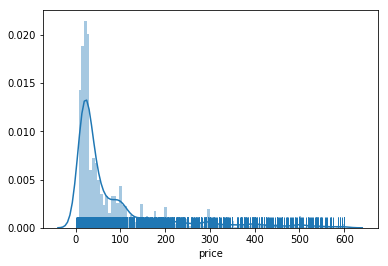

In [66]:
# Price columns looks clean with values
#
sns.distplot(gg[gg['price']<600]['price'], hist=True, rug=True, kde=True, bins=100)

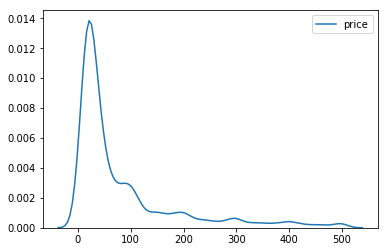

In [70]:
sns.kdeplot(gg[gg['price']<500]['price'])

In [72]:
pd.DataFrame(gg['price']).density

AttributeError: 'DataFrame' object has no attribute 'density'